# Here we test the model for the deployment and the performance.

Method 1: Use Relative Import (if inside a package)
If your folders are structured as a package (with __init__.py files), you can do:

python
Copy
Edit
from ..sister_folder.my_module import MyClass

In [144]:
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt 
import torch
from torch import nn
from models import ParticleDataset
from models import UNetHeatmap
import cv2
from torchvision import transforms

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
model.to(device)


In [149]:
root = Path().resolve()

In [159]:
# go to the file positions. 
path  = root.parent.parent / 'cnn_Unet_weights_model.pth'

WindowsPath('C:/Users/tosam/OneDrive/Desktop/Codes/CNN_object_detection/cnn_Unet_weights_model.pth')

In [ ]:
model1 = UNetHeatmap()
modd = torch.load( r'C:\Users\tosam\OneDrive\Desktop\Codes\CNN_object_detection\cnn_Unet_weights_model.pth')
modd.to(device)
modd.eval()

In [ ]:
model = torch.load(path)

def coordinate_extraction(model, image_path, device, threshold = 20, scan_radius = 2):
    '''
    Extract the postions from the heat map coordinates. Employs the model to predict the heatmaps.
    Then finds the local maxima based on the threshold and the scan_radius
    
    Params: 
        model       : CNN model 
        image_path  : path to the image location 
        device      : processor: cpu, gpu
        threshold   : cutoff based on the bacnkground noise
        scan_radius : plateau size for the heatmap pulse
        
    Returns: 
        x: array of x coordinates
        y: array of y coordinates 
        
    '''
    model.to(device)
    model.eval()
    
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) / 255.0
    img = torch.tensor(img, dtype=torch.float32).unsqueeze(0)  
    
    
    with torch.no_grad():
        HtMap_pred = modd(img.unsqueeze(0).to(device))
    
    # converts to standard grey map and pushes the heatmap to the CPU 
    heatmap = pred.squeeze().cpu().numpy()*255

    # Neighborhood size (like radius in ImageJ)
    neighborhood_size = 2

    # Apply maximum filter
    max_filt = maximum_filter(heatmap, size=neighborhood_size, mode='constant')

    # Find pixels equal to local max
    local_max = (heatmap == max_filt)

    # Threshold for noise tolerance (same as max threshold in imageJ)
    threshold = 20
    detected_peaks = local_max & (heatmap > threshold)

    # Label connected components (plateaus)
    labeled, num_features = label(detected_peaks)

    # Get centroids of plateaus (peak positions)
    peak_coords = center_of_mass(heatmap, labeled, range(1, num_features+1))
    ylist, xlist =  np.array(peak_coords).transpose()
    
    return x, y 

In [ ]:
def visualise_detection(img, radius):
    '''
    Annotes the objects to assist in understanding the correctly detected particles.
    
    Params: 
        img: the image that you are entering 
        radius: Annotation ring  
    '''
    # create a plot
    plt.figure(figsize = (6,6))
    plt.imshow(np.flipud(img.squeeze()), cmap='gray')
    plt.scatter(xlist, img.shape[2]-2-ylist, marker = 'o',facecolors='none', edgecolors='cyan', s = 90)

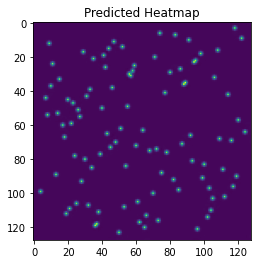

In [47]:
img_path = r'C:\Users\tosam\OneDrive\Desktop\Codes\CNN_object_detection\Imagefolder_100\000001.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) / 255.0
img = torch.tensor(img, dtype=torch.float32).unsqueeze(0)  
with torch.no_grad():
    pred = modd(img.unsqueeze(0).to(device))
    
pred = pred.squeeze().cpu().numpy()
plt.imshow(pred)
plt.title("Predicted Heatmap")
plt.savefig('')

Text(0.5, 1.0, 'Input Image')

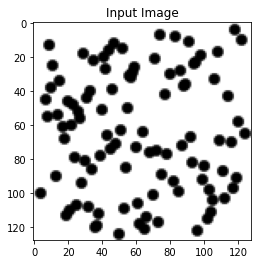

In [87]:
plt.imshow(img.squeeze(), cmap='gray')
plt.title("Input Image")

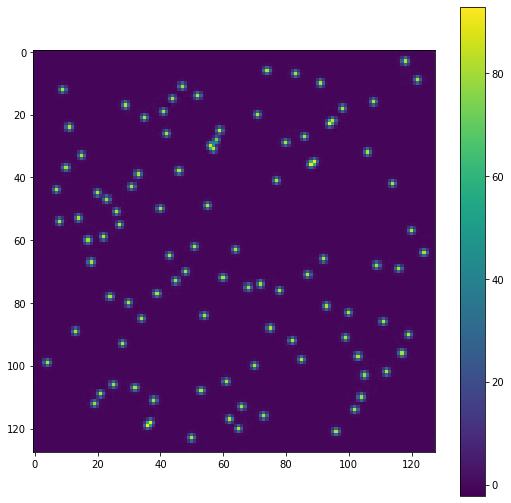

In [54]:
plt.figure(figsize = (9,9))
plt.imshow(pred*255)
plt.colorbar()

In [141]:
import numpy as np
from scipy.ndimage import maximum_filter, label, center_of_mass
import cv2

heatmap = pred*255

# Neighborhood size (like radius in ImageJ)
neighborhood_size = 2

# Apply maximum filter
max_filt = maximum_filter(heatmap, size=neighborhood_size, mode='constant')

# Find pixels equal to local max
local_max = (heatmap == max_filt)

# Threshold for noise tolerance
threshold = 20
detected_peaks = local_max & (heatmap > threshold)

# Label connected components (plateaus)
labeled, num_features = label(detected_peaks)

# Get centroids of plateaus (peak positions)
peak_coords = center_of_mass(heatmap, labeled, range(1, num_features+1))
ylist, xlist =  np.array(peak_coords).transpose()


(0.0, 128.0)

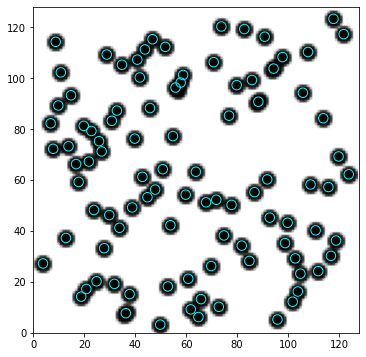

In [142]:
plt.figure(figsize = (6,6))
#plt.axis('equal')
plt.imshow(np.flipud(img.squeeze()), cmap='gray')
plt.scatter(xlist, 126-ylist, marker = 'o',facecolors='none', edgecolors='cyan', s = 90)

plt.xlim([0, 128])
plt.ylim([0, 128])